In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 1.0MB 4.6MB/s 
     |████████████████████████████████| 184kB 18.6MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 40kB 5.3MB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 2.7MB 19.3MB/s 


In [3]:
from fastbook import *

1. fastai vision library 임포트 하기
2. fastai dataset collection으로 부터 data 다운 후, paht 저장

In [4]:
from fastai2.vision.all import *
path = untar_data(URLs.PETS)/'images'

1. is_cat 함수 정의(label로서 역할)
2. ImageDataLoader를 통한 data 적재 
    - 통상적으로 이미지 파일의 라벨의 경우, 네이밍 규칙에 따라, 파일의 이름이나 , path, parent 폴더 등 사용
    - 7,390장 개/고양이 이미지(37개 종), great_pyrenees_173.jpg great pyrenees라는 개종류와 173번째 샘플의미, 고양의 경우는 첫 파일 이름이 대문자로 시작
    - file_name_func을 통해 is_cat 함수의 첫 letter가(x[0])가 대문자이면 고양이
    - train/valid set(20%)의 비율 구분
    - random seed는 매 실험 시기 마다 validation set 고정(모델변경에 다른 성능 향상이지 validation set의 randomly 교체로 인한 것이 아닌)
    - 이미지 데이터의 사이즈 조정을 위한 transformer(224 픽셀_경험치), 픽셀 사이즈가 커지면 더 좋은 결과값, but trade off speed, 메모리

In [5]:
def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

1. CNN 모델 활용, pre-trained된 resnet34(34개 레이어, 18/50/101/152-> 커질수록 학습시간 길고, overfitting 경향 높으나 더 많은 데이터 활용, 정확도 상승)
2. 성능 평가 메트릭은 error율(accuracy = 1- error rate)

In [6]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.174637,0.038068,0.009472,34:46


epoch,train_loss,valid_loss,error_rate,time
0,0.063891,0.014767,0.005413,51:06


In [7]:
img = PILImage.create('images/chapter1_cat_example.jpg')
img.to_thumb(192)

FileNotFoundError: ignored

In [8]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [9]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 0.999590


In [10]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,3.402679,2.197929,01:16


epoch,train_loss,valid_loss,time
0,1.701952,1.494914,01:23
1,1.494218,1.334961,01:22
2,1.395759,1.242748,01:21
3,1.275081,0.908207,01:20
4,1.165678,0.807869,01:21
5,1.059275,0.756609,01:21
6,0.973932,0.704189,01:21
7,0.905811,0.701727,01:20


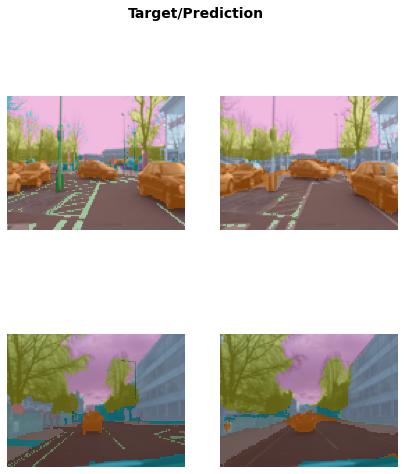

In [11]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

In [ ]:
learn.predict("I really liked that movie!")

In [ ]:
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, 
                                metrics=accuracy)
learn.fine_tune(4, 1e-2)

In [14]:
from fastai2.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [15]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.379253,0.360859,0.835074,00:07
1,0.344476,0.354036,0.838913,00:07
2,0.340639,0.351706,0.839527,00:07


In [16]:
from fastai2.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.529955,1.354000,00:00


epoch,train_loss,valid_loss,time
0,1.394325,1.295867,00:00
1,1.257336,1.123687,00:01
2,1.010172,0.855489,00:01
3,0.778404,0.747500,00:01
4,0.677241,0.725471,00:01
5,0.640914,0.720223,00:01
6,0.627151,0.718911,00:01
7,0.613814,0.717241,00:01
8,0.601072,0.716616,00:01
9,0.604348,0.716547,00:00


In [17]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,20.0,19.0,3.5,2.816558
1,8.0,32.0,3.5,3.024710
2,9.0,94.0,4.0,3.254716
3,46.0,83.0,4.0,3.121525
4,73.0,39.0,3.0,3.757285
5,66.0,7.0,5.0,4.534571
6,10.0,4.0,3.5,3.639262
7,11.0,84.0,4.0,3.613464
8,30.0,33.0,4.0,3.336463
